In [1]:
from IPython.display import clear_output
import json
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance
from tqdm import tqdm
from backtesting import Backtest, Strategy
from lib import crossover, cross
import talib as ta
from strategy import *
from util import *
from ipywidgets import widgets
clear_output()

In [2]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = Intersect #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "BANPU.BK" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2015-01-01" #@param {type:"date"}
end_date = "2022-08-28" #@param {type:"date"}
param = {'strategy_list_name':['InsideBar'],'param_size':1-1e-10,'param_fastperiod':10,'param_slowperiod':
         30
         ,'param_overbought':70,'param_oversold':30, 'param_nbdevup':2,'param_nbdevdn':2,'param_timeperiod':30}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-05 2022-08-26 2790 days          98.87036     43938.330964   

  Equity Peak [$] Return [%] Buy & Hold Return [%]  \
0  1297056.582685 -95.606167            -21.424462   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                      -22.681664      16.049542        -34.532119   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0             37.758285          0.0           0.0          0.0   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -98.157836        -21.814185              2174 days   

  Avg. Drawdown Duration # Trades  
0               393 days       46

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%      mean P&L  \
0    52.173913                   0.441498          False -20783.949327   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                -1.376749                 0.912299        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0      25.702789      -71.997535      -6.568062            253 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             61 days      0.525835      -3.985329 -1.376749

In [3]:
strategy = EMA_Cross
ticker = "BTC-USD"
start_date = "2015-01-01"
end_date = "2022-08-28"
param = {'param_size':1-1e-10,'param_fastperiod':list(np.arange(5,200,5)),'param_slowperiod':list(np.arange(5,200,5))}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False,optimize=True)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

D:\GitHub\backtesting.py_FL\backtesting\backtesting.py:1517: UserWarning: Searching for best of 741 configurations.
  output = _optimize_grid()


Start        End  Duration Exposure Time [%]  Equity Final [$]  \
0 2015-01-01 2022-08-28 2796 days         97.711834  446220976.296806   

    Equity Peak [$]   Return [%] Buy & Hold Return [%]  \
0  453929169.195244  44522.09763           6142.443061   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                     6021.932561    1622.068982        121.696186   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0            162.834478     0.747361      2.907844     1.849338   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -65.805265        -10.430382               511 days   

  Avg. Drawdown Duration # Trades  
0                36 days       28

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%         mean P&L  \
0    53.571429                   0.425277          False  15900749.153457   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 1.957225                 0.030367         True   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0    1752.975339      -24.500962      24.345543            485 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             98 days     18.881563      83.675542  1.957225

In [8]:
strategy = MACD_Cross
ticker = "BTC-USD"
start_date = "2015-01-01"
end_date = "2022-08-28"
param = {'param_size':1-1e-10,'param_fastperiod':list(np.arange(2,50,2)),'param_slowperiod':list(np.arange(2,50,2)),'param_signalperiod': list(np.arange(2,50,2))}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False,optimize=True)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

D:\GitHub\backtesting.py_FL\backtesting\backtesting.py:1517: UserWarning: Searching for best of 6624 configurations.
  output = _optimize_grid()


Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-01 2022-08-28 2796 days         91.991419  34901871.997324   

   Equity Peak [$] Return [%] Buy & Hold Return [%]  \
0  42532732.803965  3390.1872           6142.443061   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                     6021.932561    1622.068982         58.978015   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0            120.077491     0.491166      1.287698     0.673867   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -87.521767         -9.862409               898 days   

  Avg. Drawdown Duration # Trades  
0                41 days       48

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%       mean P&L  \
0         50.0                   0.557283          False  706288.999944   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 1.715144                 0.046453         True   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0     180.920423      -72.918242       7.683921            198 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             54 days      3.144622      16.085257  1.715144

In [4]:
strategy = SMA_Cross
ticker = "BTC-USD"
start_date = "2015-01-01"
end_date = "2022-08-28"
param = {'param_size':1-1e-10,'param_fastperiod':list(np.arange(5,200,5)),'param_slowperiod':list(np.arange(5,200,5))}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False,optimize=True)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

D:\GitHub\backtesting.py_FL\backtesting\backtesting.py:1517: UserWarning: Searching for best of 741 configurations.
  output = _optimize_grid()


Start        End  Duration Exposure Time [%]  Equity Final [$]  \
0 2015-01-01 2022-08-28 2796 days         96.424741  468681552.827565   

    Equity Peak [$]    Return [%] Buy & Hold Return [%]  \
0  476403049.829518  46768.155283           6142.443061   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                     6021.932561    1622.068982        123.121512   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0            161.716808      0.76134      2.980899     2.223765   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -55.366238        -10.433968               509 days   

  Avg. Drawdown Duration # Trades  
0                34 days       37

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%         mean P&L  \
0    45.945946                   0.744312          False  12640041.968313   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 2.010653                 0.025949         True   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0     963.618218      -16.662553      18.085612            299 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             73 days     13.133318      44.705316  2.010653

In [5]:
strategy = SMA_Cross
ticker = "KBANK.BK"
start_date = "2015-01-01"
end_date = "2022-08-28"
param = {'param_size':1-1e-10,'param_fastperiod':list(np.arange(5,200,5)),'param_slowperiod':list(np.arange(5,200,5))}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False,optimize=True)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

D:\GitHub\backtesting.py_FL\backtesting\backtesting.py:1517: UserWarning: Searching for best of 741 configurations.
  output = _optimize_grid()


Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-05 2022-08-26 2790 days         78.859602      2110836.218   

  Equity Peak [$]  Return [%] Buy & Hold Return [%]  \
0     2285062.218  111.083622            -28.636364   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                      -30.530973       2.289762         10.657793   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0             23.993289     0.444199      0.755134     0.330744   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -32.223708         -6.052869               580 days   

  Avg. Drawdown Duration # Trades  
0                60 days       13

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%      mean P&L  \
0    69.230769                   0.133423          False  85448.939846   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 2.523733                 0.013363         True   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0      24.927254       -3.754831       5.915401            481 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0            170 days     12.660035        6.27048  2.523733

In [6]:
strategy = EMA_Cross
ticker = "KBANK.BK"
start_date = "2015-01-01"
end_date = "2022-08-28"
param = {'param_size':1-1e-10,'param_fastperiod':list(np.arange(5,200,5)),'param_slowperiod':list(np.arange(5,200,5))}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False,optimize=True)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

D:\GitHub\backtesting.py_FL\backtesting\backtesting.py:1517: UserWarning: Searching for best of 741 configurations.
  output = _optimize_grid()


Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-05 2022-08-26 2790 days         95.804196      1881304.177   

  Equity Peak [$] Return [%] Buy & Hold Return [%]  \
0     2284085.711  88.130418            -28.636364   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                      -30.530973       2.289762          8.944365   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0              26.55915     0.336772      0.558432     0.207754   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -43.052712         -5.629342              1628 days   

  Avg. Drawdown Duration # Trades  
0                73 days       28

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%      mean P&L  \
0    42.857143                   0.827536          False  31475.149179   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 1.325241                 0.098099        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0      44.863272       -9.281062        2.28274            354 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             96 days      2.246407       2.880861  1.325241

In [4]:
opt_param_dict_to_eval_str(param)

'param_size=0.9999999999,param_fastperiod=[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90\n  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180\n 185 190 195],param_slowperiod=[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90\n  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180\n 185 190 195],constraint=lambda p: p.param_fastperiod < p.param_slowperiod'

In [16]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = Union #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "BTC-USD" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2015-01-01" #@param {type:"date"}
end_date = "2022-08-28" #@param {type:"date"}
param = {'strategy_list_name':['EMA_Cross','SMA_Cross'],'param_size':1-1e-10,'param_fastperiod':30,'param_slowperiod':50
         ,'param_overbought':70,'param_oversold':30, 'param_nbdevup':2,'param_nbdevdn':2,'param_timeperiod':30}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-01 2022-08-28 2796 days         97.890597  43946717.975618   

   Equity Peak [$]   Return [%] Buy & Hold Return [%]  \
0  72283224.920603  4294.671798           6142.443061   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                     6021.932561    1622.068982         63.831312   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0            126.529101     0.504479      1.398539     0.881042   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -72.449819        -11.771847               552 days   

  Avg. Drawdown Duration # Trades  
0                44 days       63

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%       mean P&L  \
0    44.444444                   0.843248          False  681693.936121   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 0.892074                 0.187901        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0     370.480581      -44.351797       6.189933            206 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             44 days       3.27472       13.50804  0.892074

In [3]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = OutsideBar #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "CHG.BK" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2015-01-01" #@param {type:"date"}
end_date = "2022-08-28" #@param {type:"date"}
param = {'param_size':0.5}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2015-01-05 2022-08-26 2790 days         88.811189   1100564.369332   

  Equity Peak [$] Return [%] Buy & Hold Return [%]  \
0  1211826.760887  10.056437                 100.0   

  Buy & Hold Return [%] with open DCA Return [%] Return (Ann.) [%]  \
0                           100.0       36.70326           1.30742   

  Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio Calmar Ratio  \
0             15.041349     0.086922      0.126675     0.039878   

  Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0        -32.785805         -5.352803              1631 days   

  Avg. Drawdown Duration # Trades  
0               190 days       25

Win Rate [%] p-value for Win Rate > 50% Win Rate > 50%     mean P&L  \
0         52.0                        0.5          False  4022.574773   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 0.401804                 0.345692        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0      21.186202      -24.560329       0.513895            283 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0            100 days      1.325362       1.015032  0.401804

In [ ]:
start = 5
end = 200
result = {}
for fast in np.arange(start,end-5,5):
    for slow in tqdm(np.arange(start,end,5)):
        if fast < slow:
            strategy = EMA_Cross #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
            ticker = "BTC-USD" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
            start_date = "2015-01-01" #@param {type:"date"}
            end_date = "2022-08-01" #@param {type:"date"}
            param = {'param_fastperiod' : fast, 'param_slowperiod' : slow}
            bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
            output_df = pd.DataFrame(output).T.iloc[:,:-3]
            result[(fast,slow)] = output_df['Return [%]'].values
        else:
            result[(fast,slow)] = np.nan

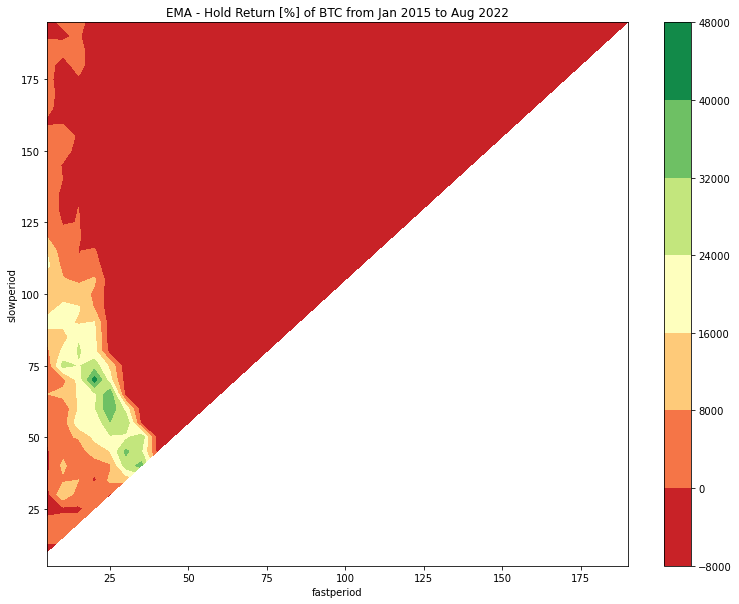

In [4]:
X = np.unique([i for i,j in result.keys()])
Y = np.unique([j for i,j in result.keys()])
X_,Y_ = np.meshgrid(X,Y)
Z = [result[x,y]-output_df['Buy & Hold Return [%]'] for x in X for y in Y]
Z_ = np.array(Z).reshape(X_.T.shape).T
plt.figure(figsize=(13,10))
plt.contourf(X_,Y_,Z_,cmap='RdYlGn')
plt.xlabel('fastperiod')
plt.ylabel('slowperiod')
plt.title('EMA - Hold Return [%] of BTC from Jan 2015 to Aug 2022')
plt.colorbar()
plt.show()

In [3]:
bt._trade_tables

Size  EntryBar  ExitBar  EntryPrice  ExitPrice           PnL  \
0   -1165120        15       16     0.85828      0.905 -54434.356432   
1    1042738        16       20     0.90681      0.895 -12314.725776   
2   -1044828        20       37     0.89321      0.925 -33215.114464   
3     971069        37       65     0.92685      0.990  61323.005012   
4    -973015        65       81     0.98802      1.060 -70037.554763   
..       ...       ...      ...         ...        ...           ...   
252   -59072      2230     2234     3.73252      3.720    739.580312   
253    59351      2234     2236     3.72744      3.720   -441.571443   
254   -59470      2236     2241     3.71256      3.760  -2821.254535   
255    57854      2241     2254     3.76752      3.700  -3906.298768   
256   -57969      2254     2255     3.69260      3.640   3049.166077   

     ReturnPct  EntryTime   ExitTime Duration  
0    -0.054434 2013-06-07 2013-06-10   3 days  
1    -0.013024 2013-06-10 2013-06-14   4 days  
2    -0.035591 2013-06-14 2013-07-10  26 days  
3     0.068134 2013-07-10 2013-08-21  42 days  
4    -0.072853 2013-08-21 2013-09-12  22 days  
..         ...        ...        ...      ...  
252   0.003354 2022-07-14 2022-07-20   6 days  
253  -0.001996 2022-07-20 2022-07-22   2 days  
254  -0.012778 2022-07-22 2022-08-02  11 days  
255  -0.017922 2022-08-02 2022-08-22  20 days  
256   0.014245 2022-08-22 2022-08-23   1 days  

[257 rows x 10 columns]

functools.partial(<class 'backtesting._Broker'>, cash=1000000, commission=0.002, margin=1.0, trade_on_close=False, hedging=False, exclusive_orders=False, index=DatetimeIndex(['2013-05-16', '2013-05-17', '2013-05-20', '2013-05-21',
               '2013-05-22', '2013-05-23', '2013-05-27', '2013-05-28',
               '2013-05-29', '2013-05-30',
               ...
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-15',
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19',
               '2022-08-22', '2022-08-23'],
              dtype='datetime64[ns]', length=2256, freq=None))

In [4]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = BolingerBands #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "BTC-USD" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2010-01-01" #@param {type:"date"}
end_date = "2022-08-24" #@param {type:"date"}
param = dict(param_timeperiod=20,param_nbdevup = 2,param_nbdevdn = 2,param_size=2,param_directed=1)
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2014-09-17 2022-08-24 2898 days         43.394274    956237.227565   

  Equity Peak [$] Return [%] Buy & Hold Return [%] DCA Return [%]  \
0  1013995.899947  -4.376277           4578.204296     1906.08647   

  Return (Ann.) [%] Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio  \
0         -0.561833              2.020278          0.0           0.0   

  Calmar Ratio Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0          0.0         -6.504439         -0.338205              1196 days   

  Avg. Drawdown Duration # Trades Win Rate [%]  
0                92 days       26         50.0

p-value for Win Rate > 50% Win Rate > 50%     mean P&L  \
0                   0.577491          False -1683.183555   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                -0.976619                 0.830943        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0      56.036489      -37.315382       0.006575            130 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0             48 days      1.301495       2.392996 -0.976619

In [6]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = EMA_Cross #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "BTC-USD" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2010-01-01" #@param {type:"date"}
end_date = "2022-08-24" #@param {type:"date"}
param_fastperiod = 25 #@param {type:"slider", min:0, max:100, step:1}
param_slowperiod = 50 #@param {type:"slider", min:0, max:100, step:1}
param = {"param_fastperiod":param_fastperiod,"param_slowperiod":param_slowperiod}
output1 = widgets.Output()
output2 = widgets.Output()
if param_fastperiod >= param_slowperiod:
  raise ValueError("fastperiod must less than slowperiod")
else:
    bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
    bt.plot()
    output_df = pd.DataFrame(output).T.iloc[:,:-3]
    display(output_df.iloc[:,:20])
    display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%]  Equity Final [$]  \
0 2014-09-17 2022-08-24 2898 days         94.032425  309730240.605343   

    Equity Peak [$]    Return [%] Buy & Hold Return [%] DCA Return [%]  \
0  323182493.230343  30873.024061           4578.204296     1906.08647   

  Return (Ann.) [%] Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio  \
0        105.886798             148.25344     0.714228      2.560384   

  Calmar Ratio Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0     1.614795        -65.572916        -10.740545               513 days   

  Avg. Drawdown Duration # Trades Win Rate [%]  
0                37 days       30    46.666667

p-value for Win Rate > 50% Win Rate > 50%         mean P&L  \
0                   0.707668          False  10291008.020178   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                  1.60085                 0.060125        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0    1692.047799       -26.32824      21.070097            494 days   

  Avg. Trade Duration Profit Factor Expectancy [%]      SQN  
0             91 days     15.516003      75.745527  1.60085

In [8]:
#@title Backtesting for MA Cross 2 Line { run: "auto", form-width: "50%" }
strategy = BarUpDown #@param [ "SMA_Cross","EMA_Cross", "DEMA_Cross","TEMA_Cross","TRIMA_Cross"] {type:"raw"}
ticker = "BTC-USD" #@param ["BTC-USD", "BNB-USD"] {allow-input: true}
start_date = "2010-01-01" #@param {type:"date"}
end_date = "2022-08-24" #@param {type:"date"}
param = {'param_max_loss':20,'param_size':0.55}
bt, output = Test_Strategy(ticker,strategy,param=param,start_date=start_date,end_date=end_date,plot=False)
bt.plot()
output_df = pd.DataFrame(output).T.iloc[:,:-3]
display(output_df.iloc[:,:20])
display(output_df.iloc[:,20:])

Start        End  Duration Exposure Time [%] Equity Final [$]  \
0 2014-09-17 2022-08-24 2898 days         99.931011   3923476.917061   

  Equity Peak [$]  Return [%] Buy & Hold Return [%] DCA Return [%]  \
0  4175197.589909  292.347692           4578.204296     1906.08647   

  Return (Ann.) [%] Volatility (Ann.) [%] Sharpe Ratio Sortino Ratio  \
0         18.780855             50.002472     0.375599      0.682239   

  Calmar Ratio Max. Drawdown [%] Avg. Drawdown [%] Max. Drawdown Duration  \
0     0.363885        -51.611993         -7.933004               615 days   

  Avg. Drawdown Duration # Trades Win Rate [%]  
0                60 days      676    38.313609

p-value for Win Rate > 50% Win Rate > 50%     mean P&L  \
0                        1.0          False  4311.595641   

  t_score for mean P&L > 0 p-value for mean P&L > 0 mean P&L > 0  \
0                 1.066786                 0.143225        False   

  Best Trade [%] Worst Trade [%] Avg. Trade [%] Max. Trade Duration  \
0     100.083723      -36.911359       0.203023             34 days   

  Avg. Trade Duration Profit Factor Expectancy [%]       SQN  
0              5 days      1.246891       0.585333  1.066786